In [478]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt



In [479]:
t = pd.read_csv("https://raw.githubusercontent.com/jbryer/CompStats/master/Data/titanic3.csv")


In [480]:
t.head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.00,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.00,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.00,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.00,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.00,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


In [481]:
t.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881138,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413493,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [482]:
t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [483]:
t.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

0    809
1    500
Name: survived, dtype: int64


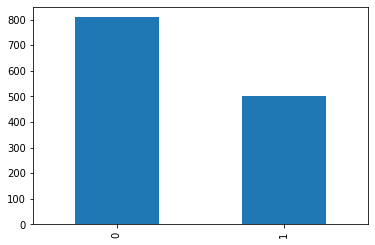

In [484]:
s=pd.value_counts(t.survived)
print(s)
s.plot.bar()

male      843
female    466
Name: sex, dtype: int64


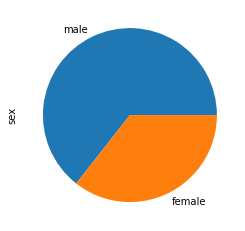

In [485]:
g=pd.value_counts(t.sex)
print(g)
g.plot.pie()

In [486]:
m=pd.value_counts((t.sex=="male") & (t.survived== 1))
print(m)
f=pd.value_counts((t.sex=="female") & (t.survived== 1))
print(f)

False    1148
True      161
dtype: int64
False    970
True     339
dtype: int64


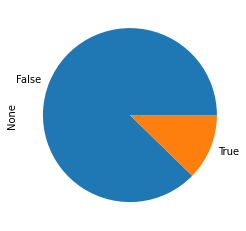

In [487]:
m.plot.pie()

In [488]:
s=t[["sex", "survived"]].groupby("sex").sum()
s

,survived
sex,
female,339
male,161


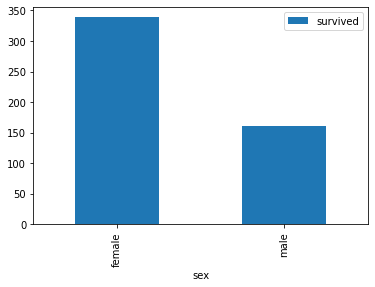

In [489]:
s.plot.bar()

In [490]:
t.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [491]:
def bar_chart(feature):
    survived = t[t['survived']==1][feature].value_counts()
    dead = t[t['survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['survived','dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

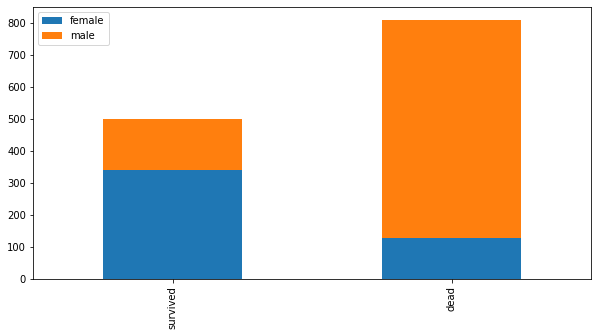

In [492]:
bar_chart('sex')

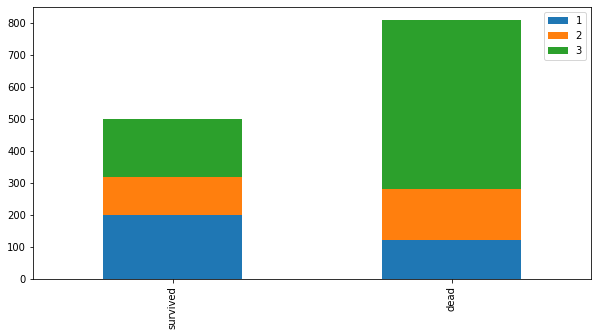

In [493]:
bar_chart('pclass')

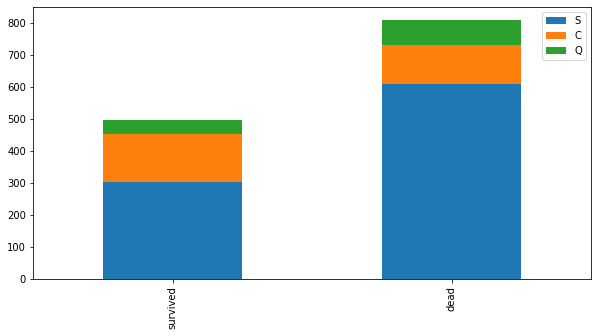

In [494]:
bar_chart('embarked')


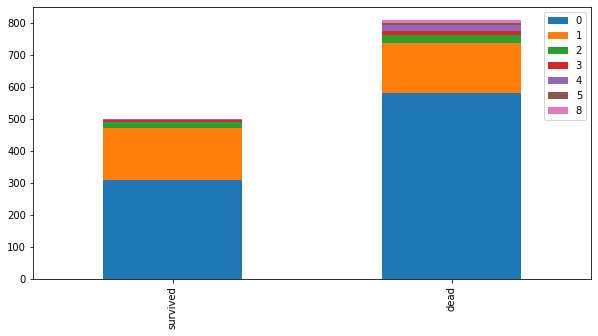

In [495]:
bar_chart('sibsp')

In [496]:
t.rename(columns={'home.dest': 'home_dest'},inplace=True)

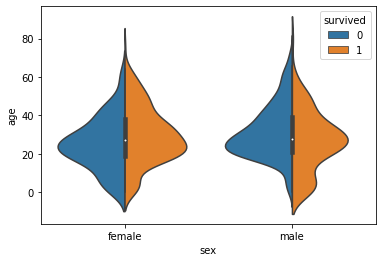

In [497]:
sns.violinplot(x ="sex", y ="age", hue ="survived",  
data = t, split = True)

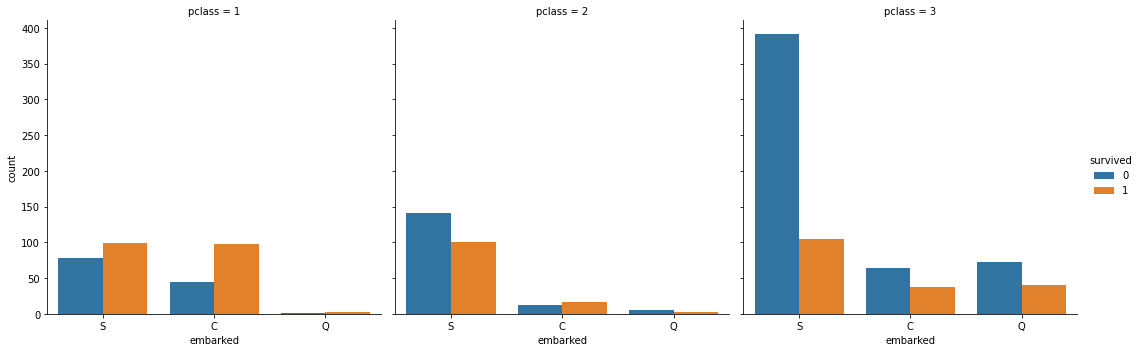

In [498]:
# Countplot 
sns.catplot(x ='embarked', hue ='survived',  
kind ='count', col ='pclass', data = t) 

In [499]:
s=t[["pclass", "survived"]].groupby("pclass").sum()
s

,survived
pclass,
1,200
2,119
3,181


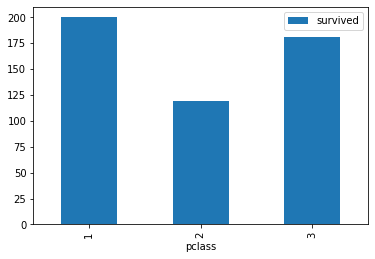

In [500]:
s.plot.bar()

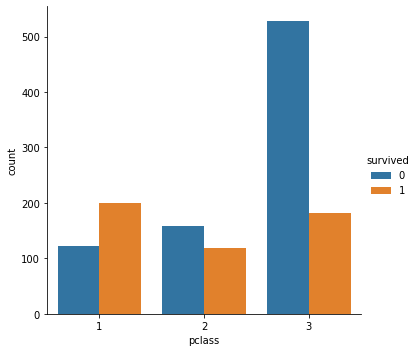

In [501]:
# Countplot
#import seaborn as sns
sns.catplot(x ='pclass', hue ='survived',  
kind ='count', data = t) 

In [502]:
data=[t]

In [503]:
t["fare"].fillna(t.fare.median(), inplace=True)
#t["age"].fillna(t.age.median(), inplace=True) 

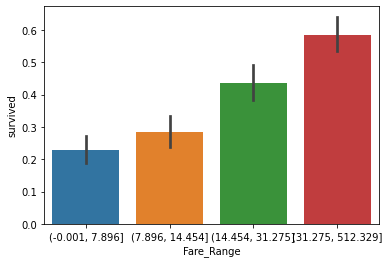

In [504]:
# Divide Fare into 4 bins 
t['Fare_Range'] = pd.qcut(t['fare'], 4) 
  
# Barplot - Shows approximate values based  
# on the height of bars. 
sns.barplot(x ='Fare_Range', y ='survived',  
data = t) 

In [505]:
for dataset in data:
    dataset.loc[ dataset['fare'] <= 7.8, 'fare'] = 0,
    dataset.loc[(dataset['fare'] > 7.8) & (dataset['fare'] <= 14.4), 'fare'] = 1,
    dataset.loc[(dataset['fare'] > 14.4) & (dataset['fare'] <= 31.3), 'fare'] = 2,
    dataset.loc[ dataset['fare'] > 31.3, 'fare'] = 3

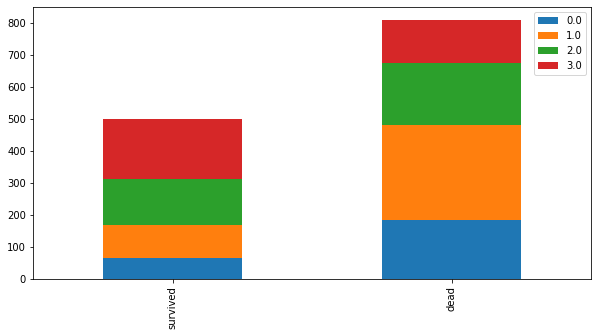

In [506]:
bar_chart('fare')

In [507]:
t.isnull().sum()

pclass           0
survived         0
name             0
sex              0
age            263
sibsp            0
parch            0
ticket           0
fare             0
cabin         1014
embarked         2
boat           823
body          1188
home_dest      564
Fare_Range       0
dtype: int64

In [508]:
t.age.median()

28.0

In [509]:
t["age"].fillna(t.age.median(), inplace=True) 

In [510]:

for dataset in data:
    dataset.loc[ dataset['age'] <= 17, 'age'] = 0,
    dataset.loc[(dataset['age'] > 17) & (dataset['age'] <= 26), 'age'] = 1,
    dataset.loc[(dataset['age'] > 26) & (dataset['age'] <= 34), 'age'] = 2,
    dataset.loc[(dataset['age'] > 34) & (dataset['age'] <= 42), 'age'] = 3,
    dataset.loc[(dataset['age'] > 42) & (dataset['age'] <= 55), 'age'] = 4,
    dataset.loc[(dataset['age'] > 55) & (dataset['age'] <= 63), 'age'] = 5,
    dataset.loc[ dataset['age'] > 63, 'age'] = 6

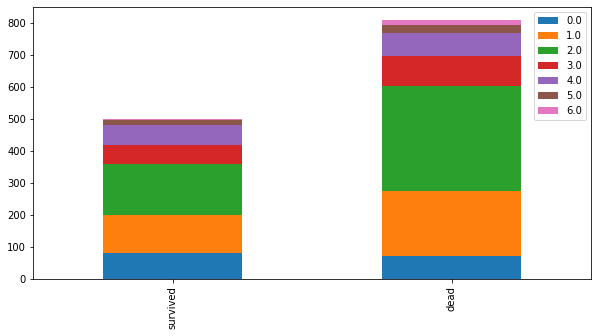

In [511]:
bar_chart('age')

In [512]:
for dataset in data:
    dataset['embarked'] = dataset['embarked'].fillna('S')

In [513]:
embarked_mapping = {"S": 0, "C": 1, "Q": 2}
for dataset in data:
    dataset['embarked'] = dataset['embarked'].map(embarked_mapping)

In [514]:
t.isnull().sum()

pclass           0
survived         0
name             0
sex              0
age              0
sibsp            0
parch            0
ticket           0
fare             0
cabin         1014
embarked         0
boat           823
body          1188
home_dest      564
Fare_Range       0
dtype: int64

In [515]:

for dataset in data:
    dataset['title'] = dataset['name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [516]:
t['title'].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Dr            8
Rev           8
Col           4
Major         2
Mlle          2
Ms            2
Don           1
Dona          1
Sir           1
Countess      1
Lady          1
Mme           1
Capt          1
Jonkheer      1
Name: title, dtype: int64

In [517]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
for dataset in data:
    dataset['title'] = dataset['title'].map(title_mapping)

In [518]:
t.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home_dest,Fare_Range,title
0,1,1,"Allen, Miss. Elisabeth Walton",female,2.0,0,0,24160,3.0,B5,0,2,NaN,"St Louis, MO","(31.275, 512.329]",1
1,1,1,"Allison, Master. Hudson Trevor",male,0.0,1,2,113781,3.0,C22 C26,0,11,NaN,"Montreal, PQ / Chesterville, ON","(31.275, 512.329]",3
2,1,0,"Allison, Miss. Helen Loraine",female,0.0,1,2,113781,3.0,C22 C26,0,NaN,NaN,"Montreal, PQ / Chesterville, ON","(31.275, 512.329]",1
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,2.0,1,2,113781,3.0,C22 C26,0,NaN,135.0,"Montreal, PQ / Chesterville, ON","(31.275, 512.329]",0
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,1.0,1,2,113781,3.0,C22 C26,0,NaN,NaN,"Montreal, PQ / Chesterville, ON","(31.275, 512.329]",2


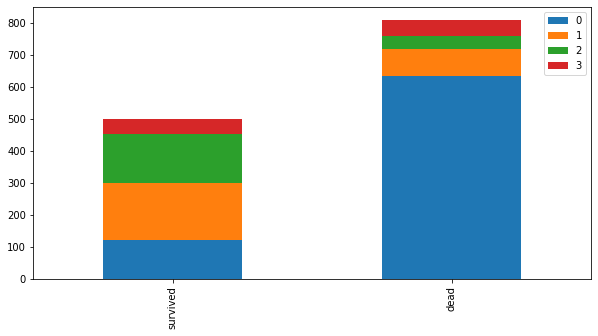

In [519]:
bar_chart('title')

In [520]:
t.drop('name', axis=1, inplace=True)


In [521]:
t.head()

,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home_dest,Fare_Range,title
0,1,1,female,2.0,0,0,24160,3.0,B5,0,2,NaN,"St Louis, MO","(31.275, 512.329]",1
1,1,1,male,0.0,1,2,113781,3.0,C22 C26,0,11,NaN,"Montreal, PQ / Chesterville, ON","(31.275, 512.329]",3
2,1,0,female,0.0,1,2,113781,3.0,C22 C26,0,NaN,NaN,"Montreal, PQ / Chesterville, ON","(31.275, 512.329]",1
3,1,0,male,2.0,1,2,113781,3.0,C22 C26,0,NaN,135.0,"Montreal, PQ / Chesterville, ON","(31.275, 512.329]",0
4,1,0,female,1.0,1,2,113781,3.0,C22 C26,0,NaN,NaN,"Montreal, PQ / Chesterville, ON","(31.275, 512.329]",2


In [522]:
sex_mapping = {"male": 0, "female": 1}
for dataset in data:
    dataset['sex'] = dataset['sex'].map(sex_mapping)

In [523]:
t.head()

,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home_dest,Fare_Range,title
0,1,1,1,2.0,0,0,24160,3.0,B5,0,2,NaN,"St Louis, MO","(31.275, 512.329]",1
1,1,1,0,0.0,1,2,113781,3.0,C22 C26,0,11,NaN,"Montreal, PQ / Chesterville, ON","(31.275, 512.329]",3
2,1,0,1,0.0,1,2,113781,3.0,C22 C26,0,NaN,NaN,"Montreal, PQ / Chesterville, ON","(31.275, 512.329]",1
3,1,0,0,2.0,1,2,113781,3.0,C22 C26,0,NaN,135.0,"Montreal, PQ / Chesterville, ON","(31.275, 512.329]",0
4,1,0,1,1.0,1,2,113781,3.0,C22 C26,0,NaN,NaN,"Montreal, PQ / Chesterville, ON","(31.275, 512.329]",2


In [524]:
t["body"].fillna(0, inplace=True)

In [525]:
t["body"]=t["body"].apply(lambda x: 1 if x!=0 else 0)


In [526]:
t.head()

,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home_dest,Fare_Range,title
0,1,1,1,2.0,0,0,24160,3.0,B5,0,2,0,"St Louis, MO","(31.275, 512.329]",1
1,1,1,0,0.0,1,2,113781,3.0,C22 C26,0,11,0,"Montreal, PQ / Chesterville, ON","(31.275, 512.329]",3
2,1,0,1,0.0,1,2,113781,3.0,C22 C26,0,NaN,0,"Montreal, PQ / Chesterville, ON","(31.275, 512.329]",1
3,1,0,0,2.0,1,2,113781,3.0,C22 C26,0,NaN,1,"Montreal, PQ / Chesterville, ON","(31.275, 512.329]",0
4,1,0,1,1.0,1,2,113781,3.0,C22 C26,0,NaN,0,"Montreal, PQ / Chesterville, ON","(31.275, 512.329]",2


In [527]:
for dataset in data:
    dataset['cabin'] = dataset['cabin'].str[:1]

In [528]:
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
for dataset in data:
    dataset['cabin'] = dataset['cabin'].map(cabin_mapping)

In [529]:
t["cabin"].fillna(t.cabin.median(), inplace=True)

Family

In [530]:
t["FamilySize"] = t["sibsp"] + t["parch"] + 1


In [531]:
t.FamilySize.value_counts()

1     790
2     235
3     159
4      43
6      25
5      22
7      16
11     11
8       8
Name: FamilySize, dtype: int64

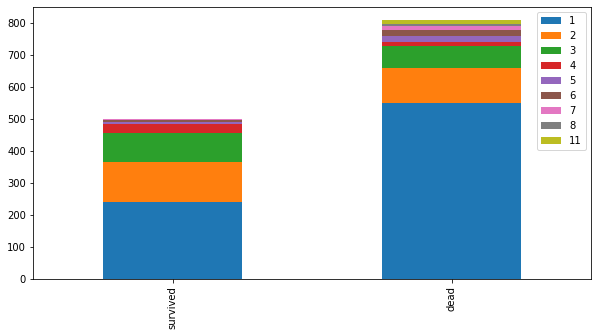

In [532]:
bar_chart('FamilySize')

In [533]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [534]:
t.head()

,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home_dest,Fare_Range,title,FamilySize
0,1,1,1,2.0,0,0,24160,3.0,0.4,0,2,0,"St Louis, MO","(31.275, 512.329]",1,0.0
1,1,1,0,0.0,1,2,113781,3.0,0.8,0,11,0,"Montreal, PQ / Chesterville, ON","(31.275, 512.329]",3,1.2
2,1,0,1,0.0,1,2,113781,3.0,0.8,0,NaN,0,"Montreal, PQ / Chesterville, ON","(31.275, 512.329]",1,1.2
3,1,0,0,2.0,1,2,113781,3.0,0.8,0,NaN,1,"Montreal, PQ / Chesterville, ON","(31.275, 512.329]",0,1.2
4,1,0,1,1.0,1,2,113781,3.0,0.8,0,NaN,0,"Montreal, PQ / Chesterville, ON","(31.275, 512.329]",2,1.2


Boat


In [535]:
t["boat"].fillna(0, inplace=True)

In [536]:
t["boat"]=t["boat"].apply(lambda x: 1 if x!=0 else 0)


In [537]:
t.head()

,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home_dest,Fare_Range,title,FamilySize
0,1,1,1,2.0,0,0,24160,3.0,0.4,0,1,0,"St Louis, MO","(31.275, 512.329]",1,0.0
1,1,1,0,0.0,1,2,113781,3.0,0.8,0,1,0,"Montreal, PQ / Chesterville, ON","(31.275, 512.329]",3,1.2
2,1,0,1,0.0,1,2,113781,3.0,0.8,0,0,0,"Montreal, PQ / Chesterville, ON","(31.275, 512.329]",1,1.2
3,1,0,0,2.0,1,2,113781,3.0,0.8,0,0,1,"Montreal, PQ / Chesterville, ON","(31.275, 512.329]",0,1.2
4,1,0,1,1.0,1,2,113781,3.0,0.8,0,0,0,"Montreal, PQ / Chesterville, ON","(31.275, 512.329]",2,1.2


In [538]:
features_drop = ['home_dest', 'Fare_Range', 'ticket']
t = t.drop(features_drop, axis=1)

In [539]:
t.head()

,pclass,survived,sex,age,sibsp,parch,fare,cabin,embarked,boat,body,title,FamilySize
0,1,1,1,2.0,0,0,3.0,0.4,0,1,0,1,0.0
1,1,1,0,0.0,1,2,3.0,0.8,0,1,0,3,1.2
2,1,0,1,0.0,1,2,3.0,0.8,0,0,0,1,1.2
3,1,0,0,2.0,1,2,3.0,0.8,0,0,1,0,1.2
4,1,0,1,1.0,1,2,3.0,0.8,0,0,0,2,1.2


In [540]:
t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pclass      1309 non-null   int64  
 1   survived    1309 non-null   int64  
 2   sex         1309 non-null   int64  
 3   age         1309 non-null   float64
 4   sibsp       1309 non-null   int64  
 5   parch       1309 non-null   int64  
 6   fare        1309 non-null   float64
 7   cabin       1309 non-null   float64
 8   embarked    1309 non-null   int64  
 9   boat        1309 non-null   int64  
 10  body        1309 non-null   int64  
 11  title       1309 non-null   int64  
 12  FamilySize  1309 non-null   float64
dtypes: float64(4), int64(9)
memory usage: 133.1 KB


In [541]:
labels=t['survived']
features = t.drop('survived', axis=1)
#features = data.iloc[:, [0,1,2,4,5]]
#features = data.iloc[:,0:-1]

from sklearn.model_selection import train_test_split

X=features

y=np.ravel(labels)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [542]:
print(X.shape)
print(y.shape)

(1309, 12)
(1309,)


In [543]:
print(X_train.shape)
print(X_test.shape)

(1047, 12)
(262, 12)


# মেশিন লার্নিং মডেলিং

In [544]:
# Importing Classifier Modules
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


In [545]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=42)

In [546]:
dt = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(dt, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

round(np.mean(score)*100, 2)

[0.95238095 0.94285714 0.98095238 0.96190476 0.99047619 0.99047619
 0.96190476 1.         0.95192308 0.96153846]


96.94

In [547]:
dt.fit(X_train, y_train)
prediction = dt.predict(X_test)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, prediction)

array([[144,   0],
       [  6, 112]])

In [548]:
rf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(rf, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

round(np.mean(score)*100, 2)

[0.94285714 0.97142857 0.99047619 0.97142857 0.98095238 0.99047619
 0.96190476 1.         0.95192308 0.95192308]


97.13

In [549]:
rf.fit(X_train, y_train)
prediction2 = rf.predict(X_test)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, prediction2)

array([[144,   0],
       [  7, 111]])

In [550]:
lr = LogisticRegression()
scoring = 'accuracy'
score = cross_val_score(lr, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
round(np.mean(score)*100, 2)

[0.93333333 0.97142857 1.         0.98095238 0.98095238 1.
 0.98095238 1.         0.94230769 0.97115385]


97.61

In [551]:
lr.fit(X_train, y_train)
prediction3 = lr.predict(X_test)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, prediction3)

array([[144,   0],
       [  7, 111]])